In [2]:
!pip install scipy

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal.windows import gaussian

def praat_striation_spectrogram(
    filepath,
    sr=None,
    window_length_sec=0.003,  # shorter window for voicing detail
    hop_length_sec=0.001,     # high time resolution
    max_freq=5000,
    dynamic_range=60,
    preemph_cutoff=50,
    cmap='gray_r',
    dpi=200,
    show_plot=True,
    save_path=None
):
    # Load audio
    y, sr = librosa.load(filepath, sr=sr)

    # Pre-emphasis
    pre_emph_coeff = np.exp(-2 * np.pi * preemph_cutoff / sr)
    y = np.append(y[0], y[1:] - pre_emph_coeff * y[:-1])

    # Window/hop
    win_length = int(window_length_sec * sr)
    hop_length = int(hop_length_sec * sr)
    n_fft = 2 ** int(np.ceil(np.log2(win_length)))
    window = gaussian(win_length, std=win_length / 6)

    # STFT
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length,
                     win_length=win_length, window=window)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Clip to dynamic range
    S_db[S_db < (np.max(S_db) - dynamic_range)] = np.max(S_db) - dynamic_range

    # Display
    times = np.linspace(0, len(y) / sr, S_db.shape[1])
    freqs = np.linspace(0, sr / 2, S_db.shape[0])

    if show_plot or save_path:
        fig, ax = plt.subplots(figsize=(12, 4), dpi=dpi)
        img = ax.imshow(S_db,
                        origin='lower',
                        aspect='auto',
                        interpolation='nearest',  # <- CRUCIAL for detail
                        cmap=cmap,
                        extent=[times[0], times[-1], freqs[0], freqs[-1]])

        ax.set_title("Praat-style Spectrogram (Striation-focused)")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Frequency (Hz)")
        ax.set_ylim(0, max_freq)

        fig.colorbar(img, ax=ax, label='dB')
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, bbox_inches='tight')
        if show_plot:
            plt.show()

    return S_db, sr


In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

example = librosa.example('libri1')

In [9]:
example

'/root/.cache/librosa/5703-47212-0000.ogg'

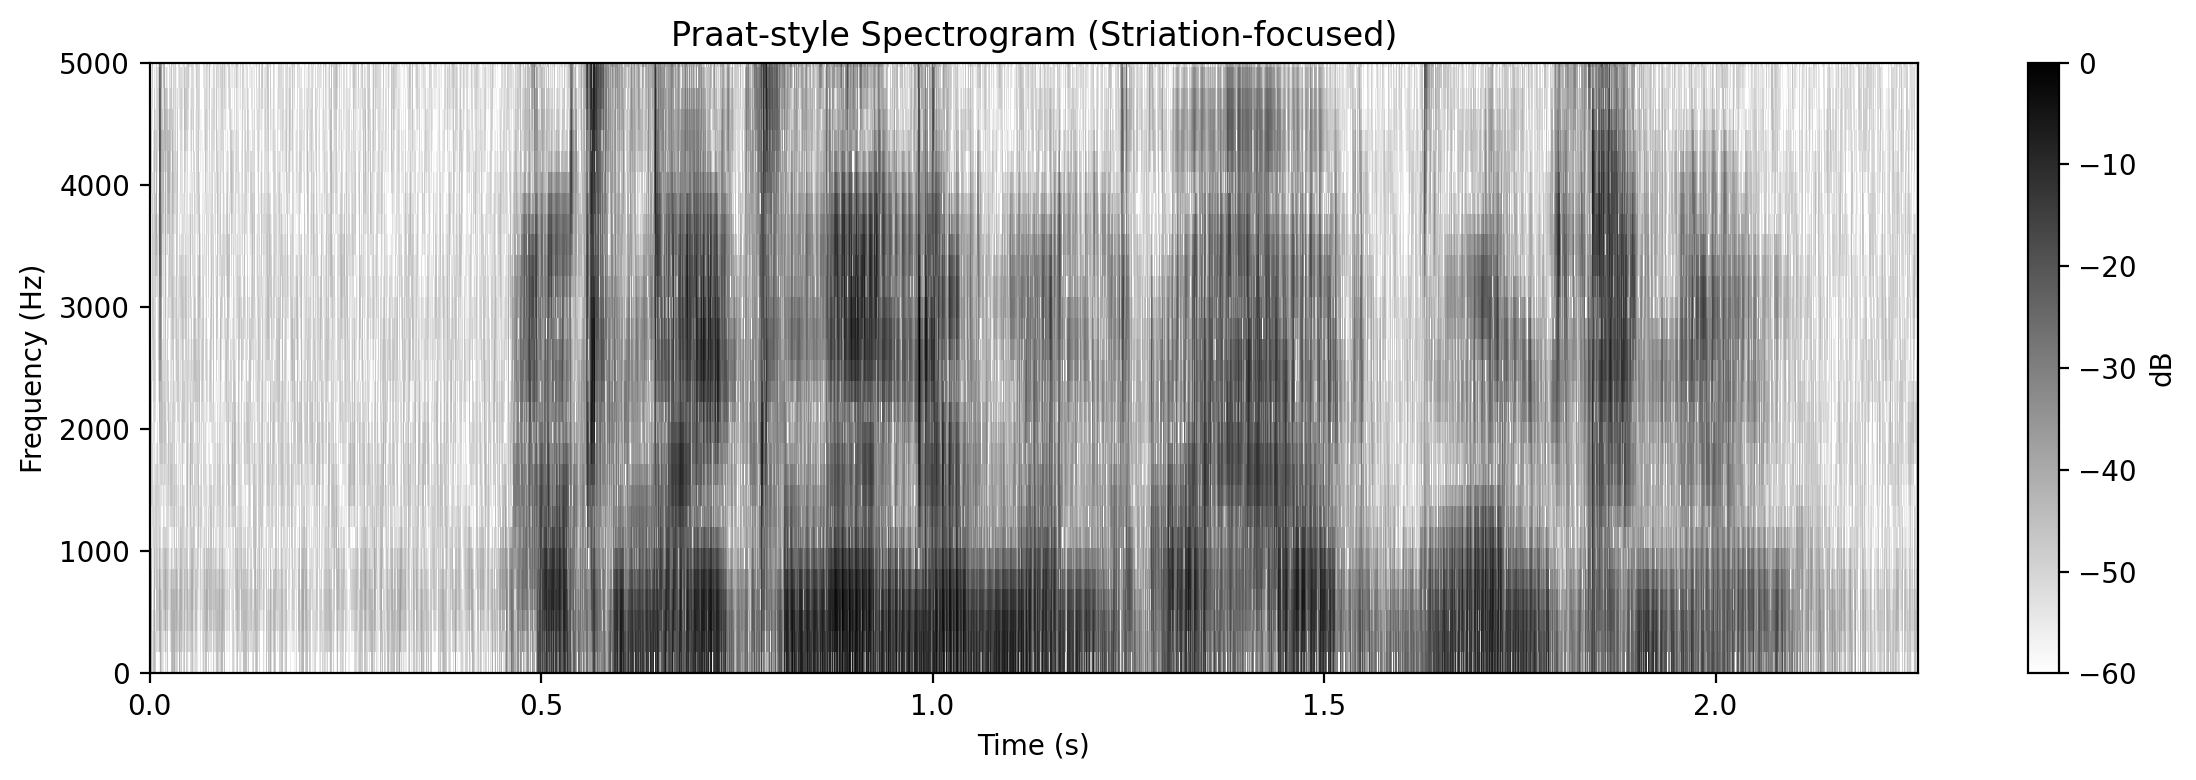

(array([[-45.07371265, -44.85438372, -56.04109187, ..., -42.68017915,
         -59.07762538, -49.61122104],
        [-43.86768985, -43.6282035 , -52.93879452, ..., -42.48273338,
         -55.53738049, -48.97483437],
        [-41.97790526, -41.44267815, -48.66576405, ..., -42.39131515,
         -52.0115122 , -47.82061638],
        ...,
        [-48.21335686, -60.        , -60.        , ..., -60.        ,
         -60.        , -60.        ],
        [-47.97970448, -59.04123968, -60.        , ..., -60.        ,
         -60.        , -60.        ],
        [-47.86925585, -58.18684907, -60.        , ..., -60.        ,
         -60.        , -60.        ]]),
 44100)

In [41]:
praat_striation_spectrogram("/content/testclip.wav", save_path="thing")